<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/inference_or_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 10)
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x), dim = 1)
    
    return x

In [13]:
model = Classifier()

images, labels = next(iter(testloader))
ps = torch.exp(model(images))

print(ps.shape)

torch.Size([64, 10])


In [14]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2],
        [2]])


In [0]:
equals = top_class == labels.view(*top_class.shape)

In [16]:
equals

tensor([[0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]], dtype=torch.uint8)

In [17]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 9.375%


In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.03)

In [0]:
epochs = 30 
steps = 0

In [23]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.519..  Test Loss: 0.441..  Test Accuracy: 0.838
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.407..  Test Accuracy: 0.851
Epoch: 3/30..  Training Loss: 0.356..  Test Loss: 0.395..  Test Accuracy: 0.860
Epoch: 4/30..  Training Loss: 0.338..  Test Loss: 0.383..  Test Accuracy: 0.867
Epoch: 5/30..  Training Loss: 0.318..  Test Loss: 0.380..  Test Accuracy: 0.863
Epoch: 6/30..  Training Loss: 0.306..  Test Loss: 0.367..  Test Accuracy: 0.871
Epoch: 7/30..  Training Loss: 0.293..  Test Loss: 0.378..  Test Accuracy: 0.872
Epoch: 8/30..  Training Loss: 0.284..  Test Loss: 0.398..  Test Accuracy: 0.861
Epoch: 9/30..  Training Loss: 0.279..  Test Loss: 0.390..  Test Accuracy: 0.875
Epoch: 10/30..  Training Loss: 0.268..  Test Loss: 0.366..  Test Accuracy: 0.877
Epoch: 11/30..  Training Loss: 0.265..  Test Loss: 0.394..  Test Accuracy: 0.867
Epoch: 12/30..  Training Loss: 0.260..  Test Loss: 0.360..  Test Accuracy: 0.877
Epoch: 13/30..  Training Loss: 0.249.

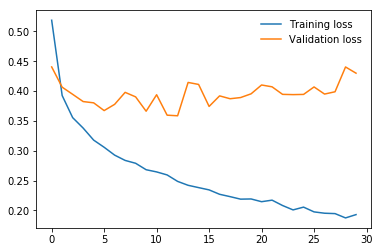

In [24]:
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
# Repetition but with Regularisation
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [26]:

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.603..  Test Loss: 0.476..  Test Accuracy: 0.827
Epoch: 2/30..  Training Loss: 0.482..  Test Loss: 0.442..  Test Accuracy: 0.840
Epoch: 3/30..  Training Loss: 0.452..  Test Loss: 0.424..  Test Accuracy: 0.843
Epoch: 4/30..  Training Loss: 0.436..  Test Loss: 0.430..  Test Accuracy: 0.850
Epoch: 5/30..  Training Loss: 0.421..  Test Loss: 0.414..  Test Accuracy: 0.853
Epoch: 6/30..  Training Loss: 0.413..  Test Loss: 0.404..  Test Accuracy: 0.854
Epoch: 7/30..  Training Loss: 0.405..  Test Loss: 0.389..  Test Accuracy: 0.859
Epoch: 8/30..  Training Loss: 0.399..  Test Loss: 0.406..  Test Accuracy: 0.858
Epoch: 9/30..  Training Loss: 0.394..  Test Loss: 0.384..  Test Accuracy: 0.862
Epoch: 10/30..  Training Loss: 0.390..  Test Loss: 0.410..  Test Accuracy: 0.854
Epoch: 11/30..  Training Loss: 0.384..  Test Loss: 0.416..  Test Accuracy: 0.858
Epoch: 12/30..  Training Loss: 0.385..  Test Loss: 0.381..  Test Accuracy: 0.869
Epoch: 13/30..  Training Loss: 0.376.

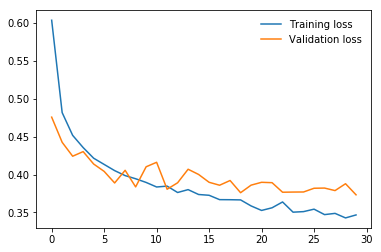

In [27]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [0]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)

# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

In [0]:
import numpy as np
num_img = img.detach()
arg = np.argmax(ps)

In [45]:
print(type(num_img), num_img.shape, arg)

<class 'torch.Tensor'> torch.Size([1, 784]) tensor(3)


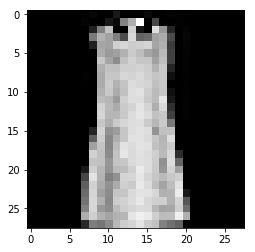

In [47]:
plt.imshow(num_img.view( 28, 28), cmap='Greys_r')